In [312]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np 
import warnings 
from tqdm import tqdm 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

# 데이터 로드 

In [254]:
data = fetch_california_housing()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['target'] = data.target

In [255]:
# Train-valid-split 
indx = int(len(df)*0.1)
train_df = df.iloc[:indx*8,:] 
test_df = df.iloc[indx*8:,:]

# 배깅 
- 모델 ratio 
- feature 
- model 종류 

In [352]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def random_sampling(df,ratio,cfg):
    features = cfg['feature']
    df_y = df.sample(frac=ratio)[cfg['feature']]['target']
    df_x = df.sample(frac=ratio)[cfg['feature']].reset_index(drop=True).drop(columns='target').values
    return df_x, df_y 

def ineference(model_list,x):
    predicted = [] 
    for model in model_list:
        y_pred = model.predict(x)
        predicted.append(y_pred)
    y_pred = np.mean(predicted,axis=0)
    return y_pred 

def metric(model_list,cfg):
    train_x,train_y = random_sampling(train_df,1,cfg)
    test_x,test_y = random_sampling(test_df,1,cfg)

    train_y_pred = ineference(model_list,train_x)
    test_y_pred = ineference(model_list,test_x)
    train_loss = mean_absolute_error(train_y,train_y_pred)
    test_loss = mean_absolute_error(test_y,test_y_pred)

    #print(f"Train MAE : {train_loss}")
    #print(f"Test MAE : {test_loss}")
    return train_loss, test_loss 

def train_epoch(cfg,model_list):
    model_save = [] 
    for model_name in model_list:
        for i in range(cfg['num_iter']):
            train_x,train_y = random_sampling(train_df,cfg['ratio'],cfg)
            model = model_name()
            model.fit(train_x,train_y)
            model_save.append(model)
    return model_save


## 학습 

## Data Ratio 

In [316]:
from sklearn.tree import DecisionTreeRegressor
cfg = {} 
cfg['ratio'] = 0.9 
cfg['num_iter'] = 100 
cfg['model'] = [DecisionTreeRegressor]
cfg['feature'] = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude', 'target']

In [317]:
total_train = []
total_test = [] 
for ratio in tqdm(list(np.arange(0.05,1.05,0.05))):
    cfg['ratio'] = ratio 
    model_list = train_epoch(cfg,LinearRegression)
    train_loss,test_loss = metric(model_list,cfg)

    total_train.append(train_loss)
    total_test.append(test_loss)
total_test = np.array(total_test)
total_train = np.array(total_train)

100%|██████████| 20/20 [00:07<00:00,  2.54it/s]


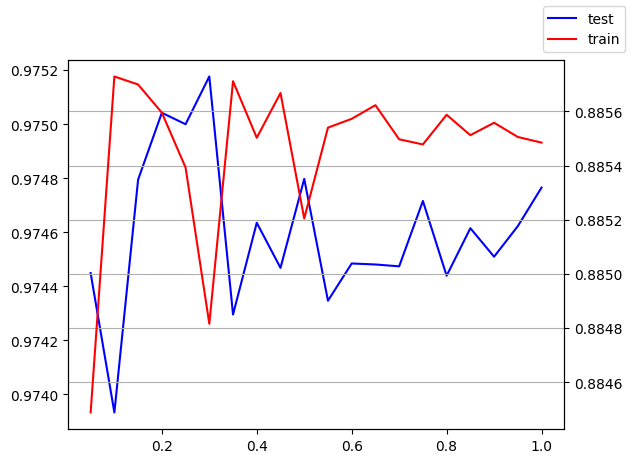

In [341]:
fig,ax = plt.subplots()

ax.plot(list(np.arange(0.05,1.05,0.05)),total_test,color='b',label='test')


ax1 = ax.twinx()
ax1.plot(list(np.arange(0.05,1.05,0.05)),total_train,color='r',label='train')
fig.legend()
plt.grid(True)

plt.show()

## Model 을 달리 하는 경우 

In [389]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge,TweedieRegressor,SGDRegressor
from sklearn.svm import SVR 
from sklearn.svm import LinearSVR
cfg = {} 
cfg['ratio'] = 1
cfg['num_iter'] = 1 
cfg['model'] = [DecisionTreeRegressor]
cfg['feature'] = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                'Latitude', 'Longitude', 'target']
model_kind = [DecisionTreeRegressor,LinearRegression,SVR,LinearSVR,BayesianRidge,Ridge,TweedieRegressor,SGDRegressor]                

In [ ]:

train = []
test = [] 
for i in tqdm(range(50)):
    total_train = []
    total_test = [] 
    for model_num in tqdm(list(np.arange(1,8,1))):
        cfg['model'] = np.random.choice(model_kind,2)
        model_save = train_epoch(cfg,cfg['model'])
        train_loss,test_loss = metric(model_save,cfg)

        total_train.append(train_loss)
        total_test.append(test_loss)
    
    total_test = np.array(total_test)
    total_train = np.array(total_train)
    
    train.append(total_train)
    test.append(total_test)

train = np.mean(np.array(train),axis=0)
test = np.mean(np.array(test),axis=0)    

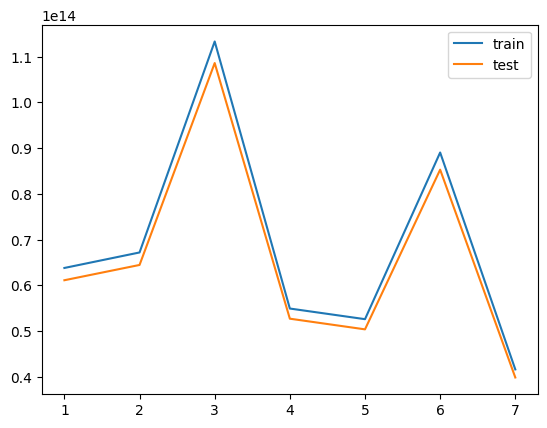

In [438]:
plt.plot(list(np.arange(1,8,1)),train,label='train')
plt.plot(list(np.arange(1,8,1)),test,label='test')
plt.legend()
plt.show()

# Feature를 달리 하는 경우 